## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df1_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")
df1_combined = df1_combined.rename(columns={'Mouse ID':'Mouse_ID'})
df1_combined

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the DataFrame.
Mice_count = len(df1_combined['Mouse_ID'].unique())
Mice_count


249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mice_value_count = df1_combined['Mouse_ID'].value_counts()
Mice_value_count

g989    13
o562    10
m550    10
c264    10
j913    10
        ..
d133     1
b447     1
h428     1
t573     1
f932     1
Name: Mouse_ID, Length: 249, dtype: int64

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = df1_combined.loc[df1_combined.duplicated(subset=['Mouse_ID', 'Timepoint']),'Mouse_ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#df2_clean = df1_combined.drop_duplicates(['g989'])
#df2_clean
df2_clean = df1_combined[df1_combined.Mouse_ID != 'g989']
df2_clean


,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice in the clean DataFrame.
#Mice_count = len(df1_combined['Mouse_ID'].unique())
Clean_Mice_count= len(df2_clean['Mouse_ID'].unique())
Clean_Mice_count

248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = df2_clean.groupby(['Drug Regimen'])
regimen_mean_1 = regimen_group['Tumor Volume (mm3)'].mean()
regimen_median = regimen_group['Tumor Volume (mm3)'].median()
regimen_var=regimen_group['Tumor Volume (mm3)'].var()
regimen_std=regimen_group['Tumor Volume (mm3)'].std()
regimen_sem=regimen_group['Tumor Volume (mm3)'].sem()
regimen_mean_1
# This method is the most straighforward, creating multiple series and putting them all together at the end.

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary =pd.DataFrame({"Regimen Mean": regimen_mean_1,
                                    "Regimen Median": regimen_median, 
                               "Regimen Variance": regimen_var, 
                               "Regimen Std Deviation": regimen_std,"Regimen sem": regimen_sem})

regimen_summary


,Regimen Mean,Regimen Median,Regimen Variance,Regimen Std Deviation,Regimen sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

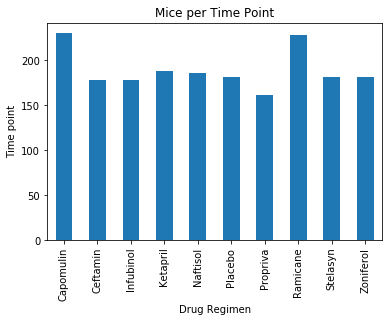

In [158]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_group = df1_combined.groupby('Drug Regimen')
mice_groups=mice_group.count()
mice_groups
mice_timepoint = mice_groups['Timepoint']
mice_timepoint
test = pd.DataFrame(mice_timepoint)
test=test.reset_index()
#test
test['Timepoint']
mice_bar_plot =mice_timepoint.plot(kind='bar',title ="Mice per Time Point")
plt.xlabel("Drug Regimen")
plt.ylabel("Time point")
plt.show()



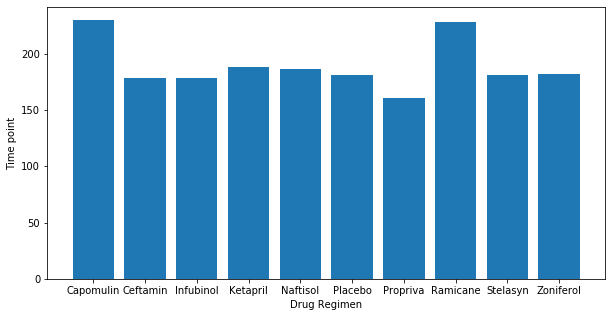

In [228]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.figure(figsize=(10,5))
mice_chart_2 = plt.bar("Drug Regimen","Timepoint", data = test)
plt.xlabel("Drug Regimen")
plt.ylabel("Time point")
plt.show()


## Pie Plots

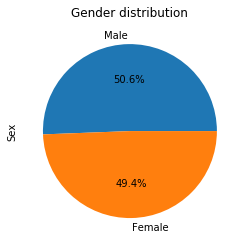

In [236]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender = df1_combined['Sex'].value_counts()
Gender
Pie_1 = Gender.plot(kind='pie',title ="Gender distribution",autopct="%1.1f%%")



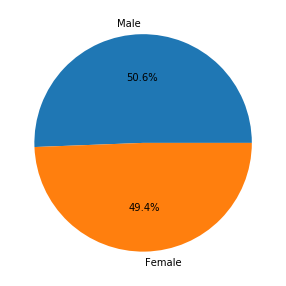

In [234]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,5))
Gender_Value=["Male","Female"]
pie_2 = plt.pie(Gender,labels=Gender_Value,autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [194]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
df3 = df2_clean[['Mouse_ID','Drug Regimen','Tumor Volume (mm3)','Timepoint','Weight (g)']]
df3
# Capomulin
df4 = df3.loc[df3["Drug Regimen"]=="Capomulin",:]
df4_C= df4['Tumor Volume (mm3)']
df4_C_max=df4_C.max()
print(f"The max value is: {df4_C_max}")
quartiles = df4_C.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile of range is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be Capomulin outliers.")
print(f"Values above {upper_bound} could be Capomulin outliers.")



The max value is: 48.15820939
The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile of range is: 7.314067135000002
Values below 26.714832162499995 could be Capomulin outliers.
Values above 55.9711007025 could be Capomulin outliers.


In [195]:
#Ramicane
df5 = df3.loc[df3["Drug Regimen"]=="Ramicane",:]
df4_R= df5['Tumor Volume (mm3)']
df4_R_max=df4_R.max()
print(f"The max value is: {df4_R_max}")
quartiles = df4_R.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile of range is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be Ramicane outliers.")
print(f"Values above {upper_bound} could be Ramicane outliers.")


The max value is: 47.62281636
The lower quartile of Ramicane is: 36.67463458499999
The upper quartile of Ramicane is: 45.0
The interquartile of range is: 8.325365415000007
Values below 24.18658646249998 could be Ramicane outliers.
Values above 57.48804812250001 could be Ramicane outliers.


In [196]:
#Ketapril
df6 = df3.loc[df3["Drug Regimen"]=="Ketapril",:]
df4_k= df6['Tumor Volume (mm3)']
df4_k_max=df4_k.max()
print(f"The max value is: {df4_k_max}")
quartiles = df4_k.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Ketapril is: {lowerq}")
print(f"The upper quartile of Ketapril is: {upperq}")
print(f"The interquartile of range is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be Ketapril outliers.")
print(f"Values above {upper_bound} could be Ketapril outliers.")



The max value is: 78.56701362
The lower quartile of Ketapril is: 48.2329872925
The upper quartile of Ketapril is: 60.870951107500005
The interquartile of range is: 12.637963815000006
Values below 29.27604156999999 could be Ketapril outliers.
Values above 79.82789683000001 could be Ketapril outliers.


In [197]:
#Placebo
df8 = df3.loc[df3["Drug Regimen"]=="Placebo",:]
df4_P= df8['Tumor Volume (mm3)']
df4_P_max=df4_P.max()
print(f"The max value is: {df4_P_max}")
quartiles = df4_k.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Placebo is: {lowerq}")
print(f"The upper quartile of Placebo is: {upperq}")
print(f"The interquartile of range is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be Placebo outliers.")
print(f"Values above {upper_bound} could be Placebo outliers.")

The max value is: 73.21293851
The lower quartile of Placebo is: 48.2329872925
The upper quartile of Placebo is: 60.870951107500005
The interquartile of range is: 12.637963815000006
Values below 29.27604156999999 could be Placebo outliers.
Values above 79.82789683000001 could be Placebo outliers.


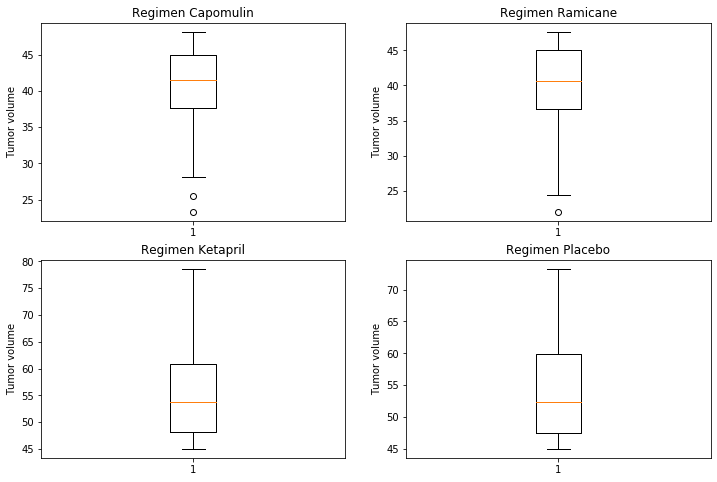

In [198]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax= plt.subplots(ncols=2,nrows=2,figsize=(12,8))
ax[0,0].boxplot(df4_C)
ax[0,0].set_title('Regimen Capomulin' )
ax[0,0].set_ylabel('Tumor volume')
ax[0,1].boxplot(df4_R)
ax[0,1].set_title('Regimen Ramicane' )
ax[0,1].set_ylabel('Tumor volume')
ax[1,0].boxplot(df4_k)
ax[1,0].set_title('Regimen Ketapril' )
ax[1,0].set_ylabel('Tumor volume')
ax[1,1].boxplot(df4_P)
ax[1,1].set_title('Regimen Placebo' )
ax[1,1].set_ylabel('Tumor volume')
plt.tight_layout
plt.show()

## Line and Scatter Plots

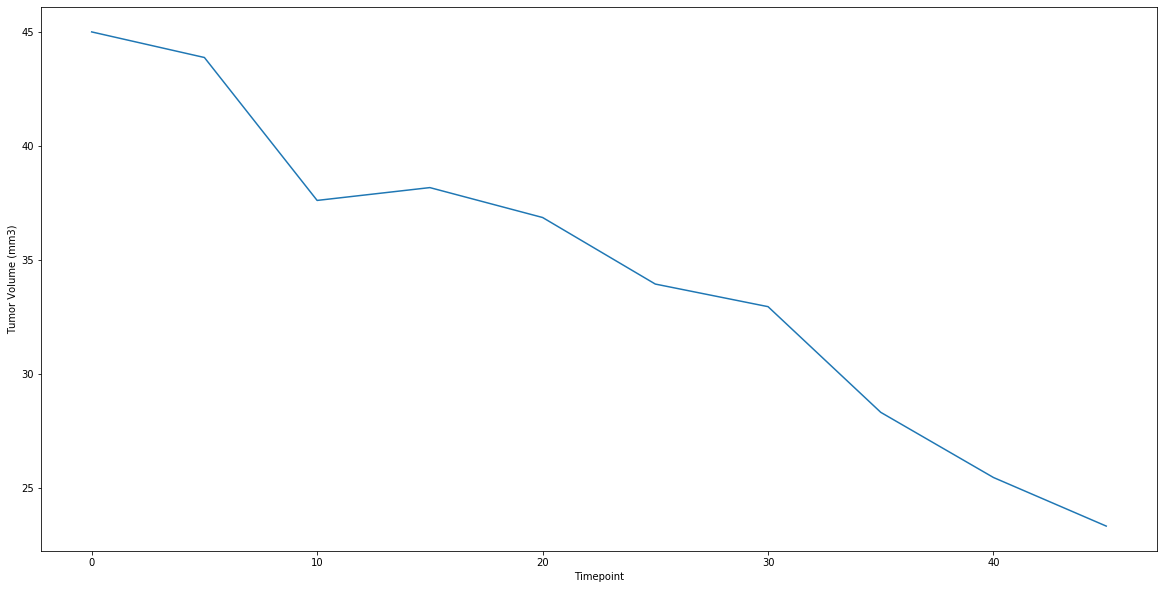

In [237]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df4 =df4[df4["Mouse_ID"]=='s185']
plt.figure(figsize=(20,10))
Line_Plot= plt.plot("Timepoint","Tumor Volume (mm3)", data = df4)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Text(0, 0.5, 'Average tumor volume')

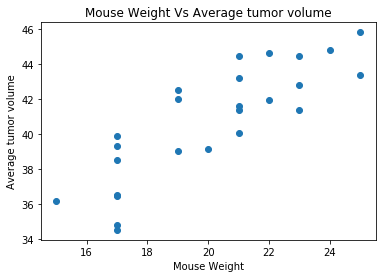

In [238]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
New_df= df3.loc[df3["Drug Regimen"]=="Capomulin",:]
New_df
Avg_df5 = New_df.groupby('Mouse_ID').mean()
Avg_df5
#Avg_TV= df4['Tumor Volume (mm3)'].mean()
plot_Scatter = plt.scatter('Weight (g)','Tumor Volume (mm3)', data =Avg_df5)
plt.title('Mouse Weight Vs Average tumor volume')
plt.xlabel("Mouse Weight")
plt.ylabel("Average tumor volume")


## Correlation and Regression

In [219]:
# Calculate the correlation coefficient and linear regression model

# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Avg_df5['Weight (g)'],Avg_df5['Tumor Volume (mm3)'])
correlation

(0.8419363424694717, 1.322572243471279e-07)

Text(0, 0.5, 'Average tumor volume')

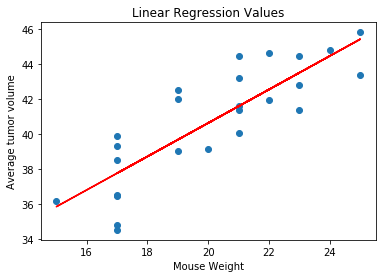

In [239]:
x_values = Avg_df5['Weight (g)']
y_values = Avg_df5['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Linear Regression Values')
plt.xlabel("Mouse Weight")
plt.ylabel("Average tumor volume")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")